# Práctica 5

In [1]:
install = FALSE
if (install) {
    install.packages("dplyr")
    install.packages("randomForest")
    install.packages("pdp")
    install.packages("ggplot2")
    install.packages("plotly")
    install.packages("gridExtra")
    install.packages("MASS")
}

In [2]:
library("dplyr")
library("randomForest")
library("pdp")
library("ggplot2")
library("plotly")
library("lubridate")
library("gridExtra")
library("MASS")


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union


randomForest 4.7-1.2

Type rfNews() to see new features/changes/bug fixes.


Attaching package: ‘randomForest’


The following object is masked from ‘package:dplyr’:

    combine



Attaching package: ‘ggplot2’


The following object is masked from ‘package:randomForest’:

    margin



Attaching package: ‘plotly’


The following object is masked from ‘package:ggplot2’:

    last_plot


The following object is masked from ‘package:stats’:

    filter


The following object is masked from ‘package:graphics’:

    layout



Attaching package: ‘lubridate’


The following objects are masked from ‘package:base’:

    date, intersect, setdiff, union



Attaching package: ‘gridExtra’


The following object is masked from ‘package:randomForest’:

    combine


The following object is masked from 

In [3]:
bike_data = read.csv("day.csv")

# One-hot encoding para 'season'
bike_data <- bike_data %>%
  mutate(season_2 = as.integer(season == 2),
         season_3 = as.integer(season == 3),
         season_4 = as.integer(season == 4))

# Crear las variables MISTY y RAIN
bike_data <- bike_data %>%
  mutate(MISTY = as.integer(weathersit == 2),
         RAIN = as.integer(weathersit %in% c(3, 4)))

# Desnormalizar variables (según lo indicado en la documentación del dataset)
bike_data <- bike_data %>%
  mutate(temp = (temp * 39) + 8,
         hum = hum * 100,
         windspeed = windspeed * 67)

# Crear la variable days_since_2011
bike_data <- bike_data %>%
  mutate(days_since_2011 = as.integer(difftime(ymd(dteday), ymd("2011-01-01"), units = "days")))

In [4]:
target <- "cnt"

X <- bike_data
y <- bike_data[, target]

set.seed(27)
# Ajustar un modelo lineal
rf_model <- randomForest(x = X, y = y, ntree = 100)

In [5]:
# Create partial dependence plots
pdp_days <- partial(rf_model, pred.var = "days_since_2011")
pdp_temp <- partial(rf_model, pred.var = "temp")
pdp_hum <- partial(rf_model, pred.var = "hum")
pdp_windspeed <- partial(rf_model, pred.var = "windspeed")

# Plot the partial dependence profiles using ggplot2
plot_days <- autoplot(pdp_days, ylab = "Predicted Bike Rentals", xlab = "Days Since 2011") +
  ggtitle("Partial Dependence Plot for Days Since 2011")

plot_temp <- autoplot(pdp_temp, ylab = "Predicted Bike Rentals", xlab = "Temperature") +
  ggtitle("Partial Dependence Plot for Temperature")

plot_hum <- autoplot(pdp_hum, ylab = "Predicted Bike Rentals", xlab = "Humidity") +
  ggtitle("Partial Dependence Plot for Humidity")

plot_windspeed <- autoplot(pdp_windspeed, ylab = "Predicted Bike Rentals", xlab = "Wind Speed") +
  ggtitle("Partial Dependence Plot for Wind Speed")

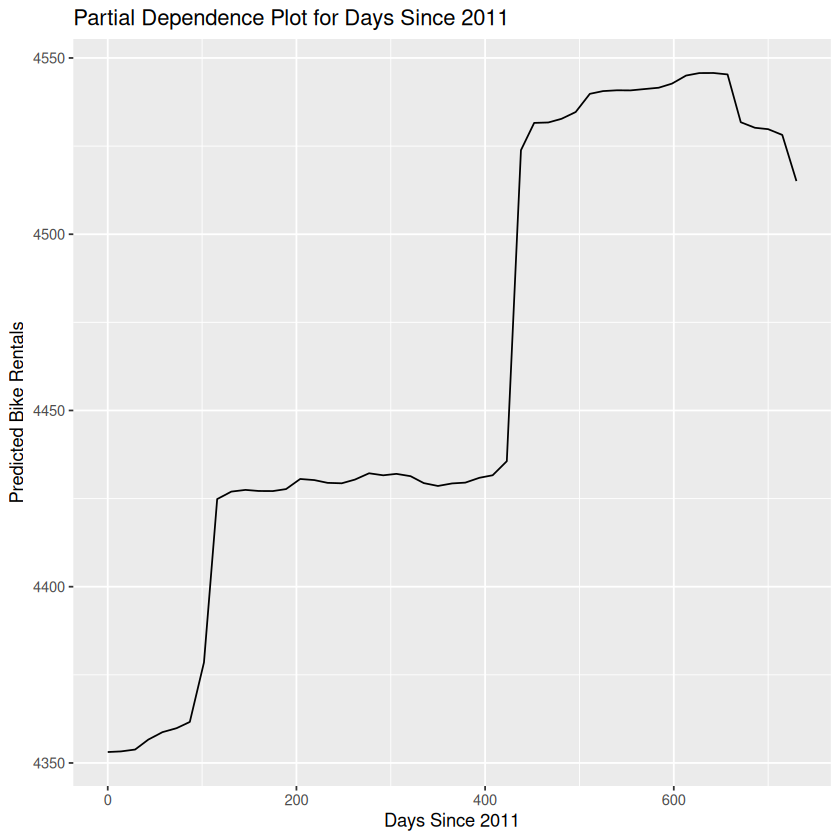

In [6]:
plot_days

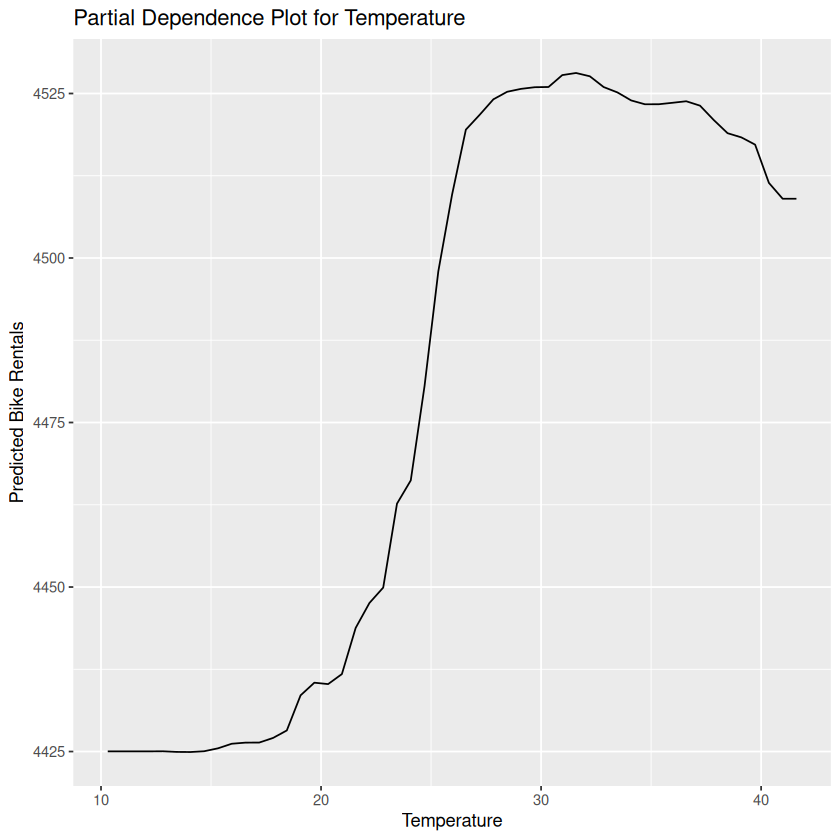

In [7]:
plot_temp

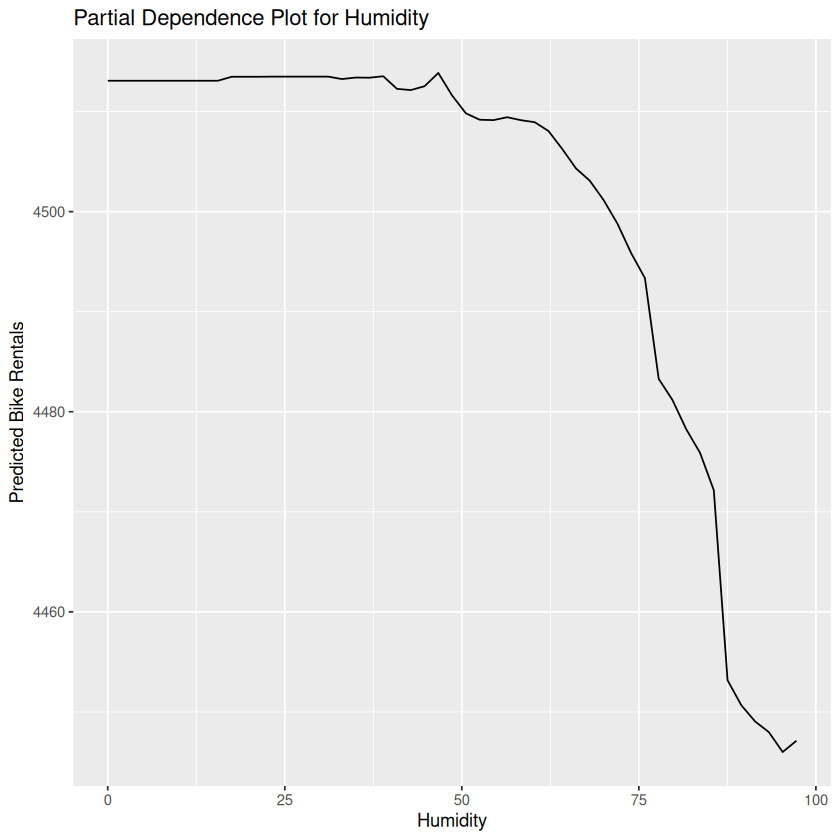

In [8]:
plot_hum

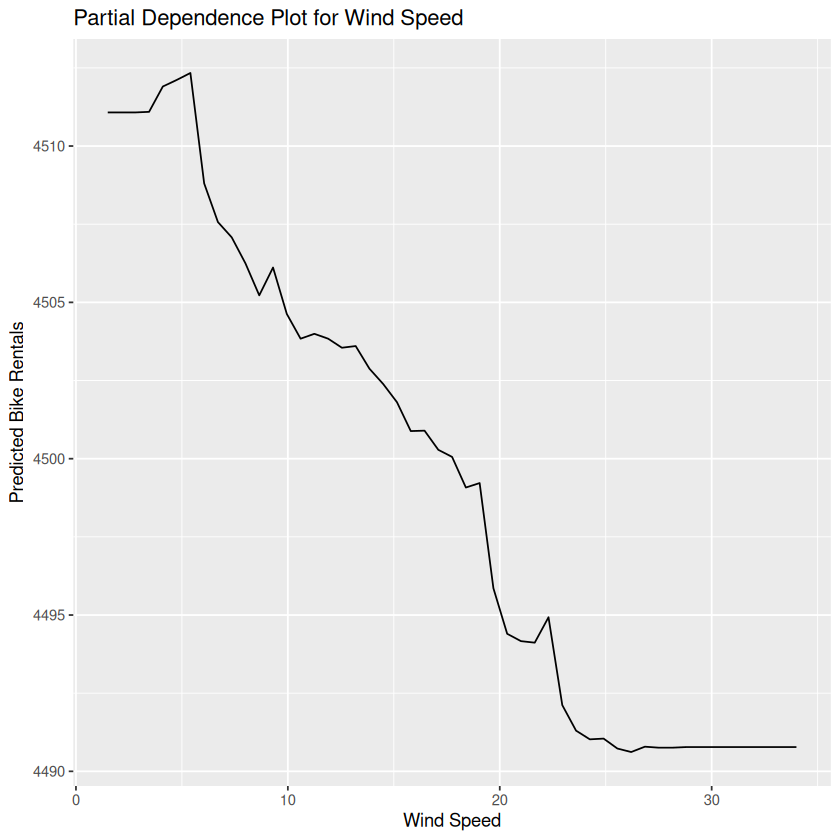

In [9]:
plot_windspeed

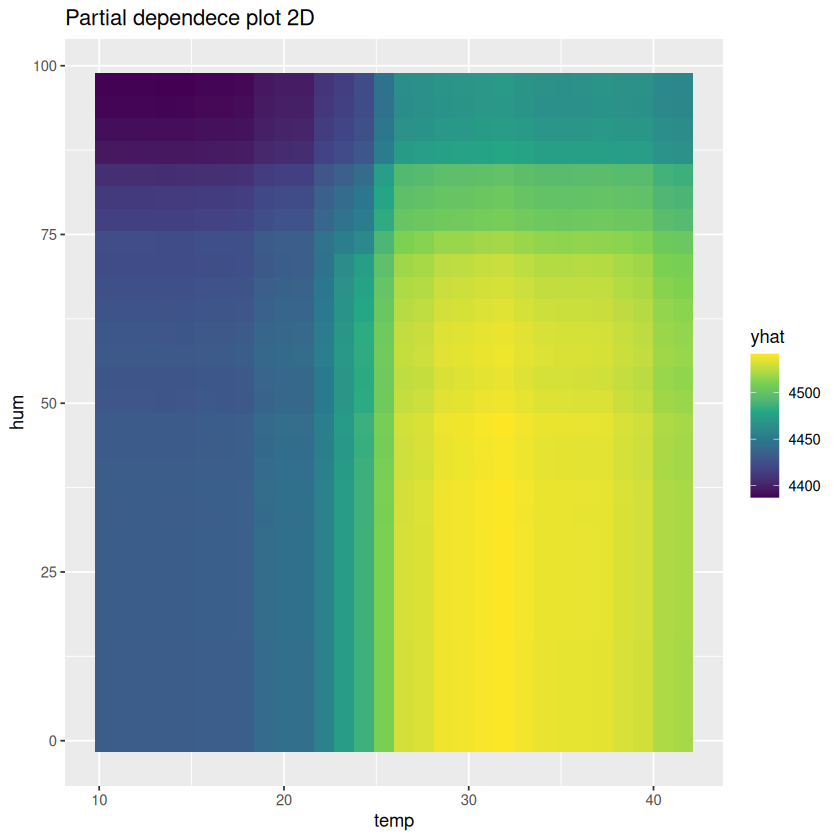

In [15]:
# Create 2D partial dependence data
pdp_2d <- partial(rf_model, pred.var = c("temp", "hum"), grid.resolution = 30)

plot_2d <- autoplot(pdp_2d, ylab = "hum", xlab = "temp") +
  ggtitle("Partial dependece plot 2D")
plot_2d

In [49]:
house_data = read.csv("kc_house_data.csv")

In [55]:
# Define features and target variable
features_house <- c("bedrooms", "bathrooms", "sqft_living", "floors", "sqft_lot", "yr_built")
target_house <- "price"

X_house <- house_data[, features_house]
y_house <- house_data[, target_house]

# Fit a Random Forest Regressor model on the sample
rf_model_house <- randomForest(x = X_house, y = y_house, ntree = 100)

# Create partial dependence plots for the specified features
pdp_bedrooms <- partial(rf_model_house, pred.var = "bedrooms")
pdp_bathrooms <- partial(rf_model_house, pred.var = "bathrooms")
pdp_sqft_living <- partial(rf_model_house, pred.var = "sqft_living")
pdp_floors <- partial(rf_model_house, pred.var = "floors")

# Plot the partial dependence profiles using ggplot2
plot_bedrooms <- autoplot(pdp_bedrooms, ylab = "Predicted House Price", xlab = "Bedrooms") +
  ggtitle("Partial Dependence Plot for Bedrooms") + theme_bw()

plot_bathrooms <- autoplot(pdp_bathrooms, ylab = "Predicted House Price", xlab = "Bathrooms") +
  ggtitle("Partial Dependence Plot for Bathrooms") + theme_bw()

plot_sqft_living <- autoplot(pdp_sqft_living, ylab = "Predicted House Price", xlab = "Sqft Living") +
  ggtitle("Partial Dependence Plot for Sqft Living") + theme_bw()

plot_floors <- autoplot(pdp_floors, ylab = "Predicted House Price", xlab = "Floors") +
  ggtitle("Partial Dependence Plot for Floors") + theme_bw()

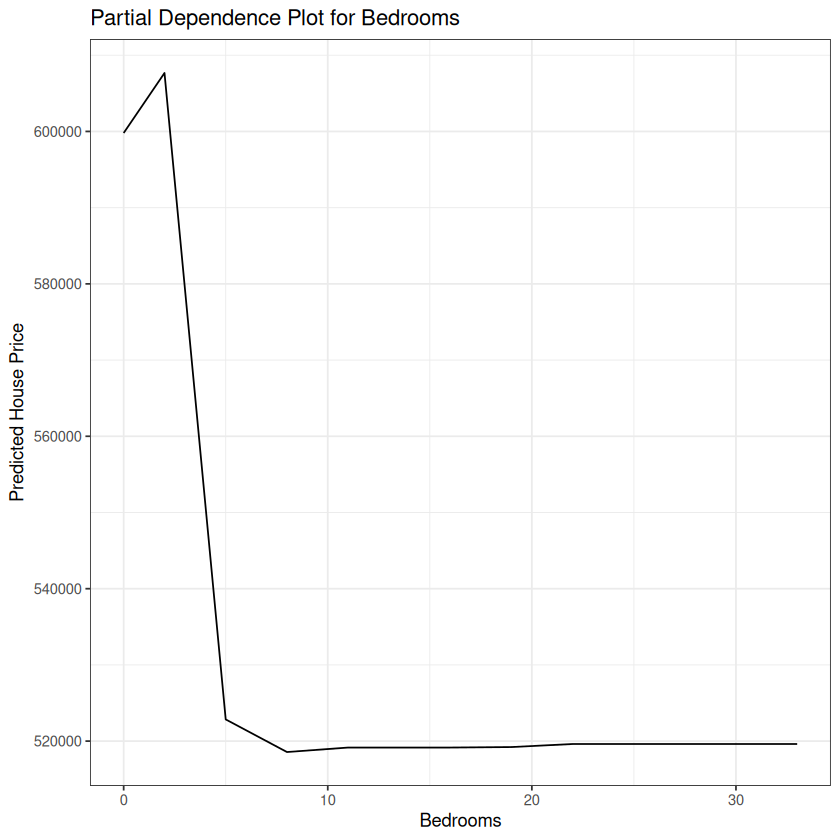

In [56]:
plot_bedrooms

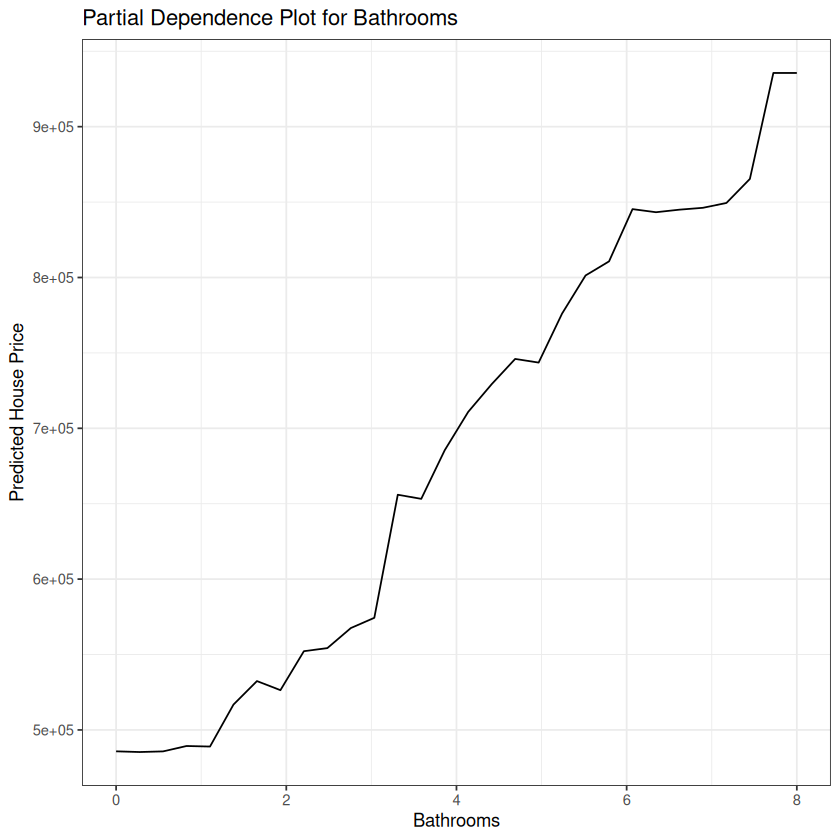

In [57]:
plot_bathrooms

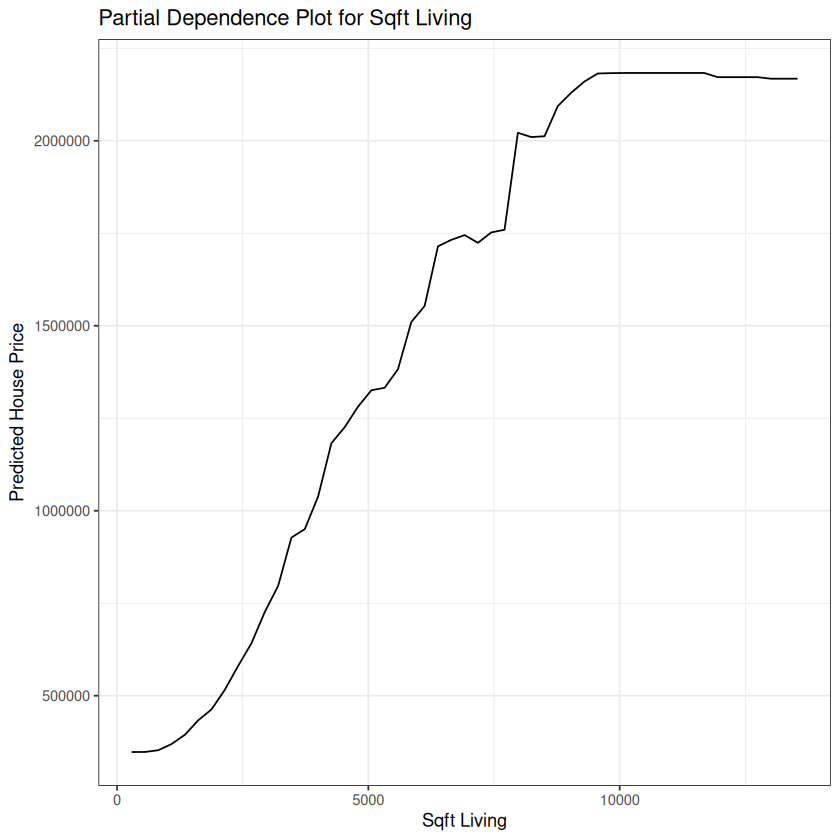

In [58]:
plot_sqft_living

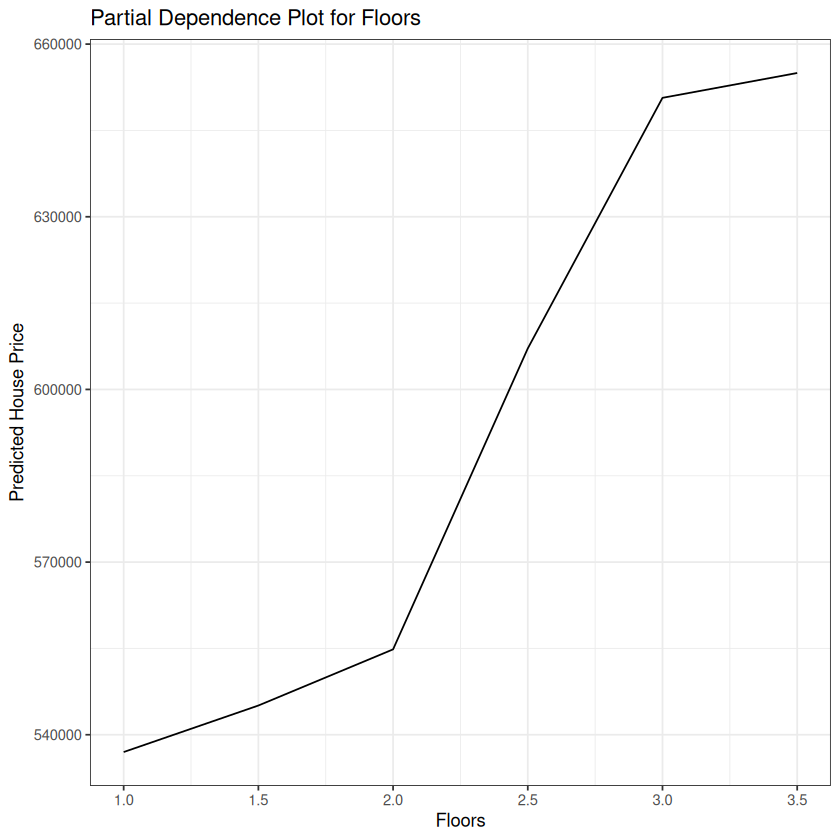

In [59]:
plot_floors

## Analysis of the Influence of Features on Predicted House Price:

### Bedrooms:
The partial dependence plot for 'bedrooms' will likely show how the predicted
house price changes with the number of bedrooms, on average. You might observe
an initial increase in price as the number of bedrooms increases, reflecting the
value of more living space. However, this effect might plateau or even slightly
decrease beyond a certain number of bedrooms, possibly due to diminishing returns
or the characteristics of very large houses in the dataset.

### Bathrooms:
The 'bathrooms' plot is also expected to show a positive correlation with the
predicted house price. More bathrooms generally add value to a house. The shape
of the curve will indicate the magnitude of this effect at different numbers of
bathrooms. You might see a steeper increase in price for the initial additions
of bathrooms.

### Sqft Living:
The partial dependence plot for 'sqft_living' (square footage of living space)
is highly likely to show a strong positive relationship with the predicted house
price. As the living area increases, the predicted price should also increase
substantially. The plot will illustrate the nature of this relationship (linear,
non-linear, etc.) as learned by the random forest model. It's a key indicator of
house value.

### Floors:
The 'floors' plot might show a more complex relationship. Generally, houses with
more floors can be more expensive due to factors like construction costs and
potentially larger overall square footage or different architectural styles.
The plot will reveal how the predicted price varies with the number of floors.
It's possible that the effect is not strictly linear; for example, the difference
between 1 and 2 floors might be more significant than the difference between
2 and 3 floors, depending on the data.